In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import time

In [2]:
adata = sc.read_h5ad('nestorowa.data2.h5ad')
adata

AnnData object with n_obs × n_vars = 1656 × 46078
    obs: 'cell_label'
    uns: 'iroot'
    obsm: 'X_pca'

In [3]:
sc.pp.neighbors(adata, 10,use_rep='X_pca') 
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

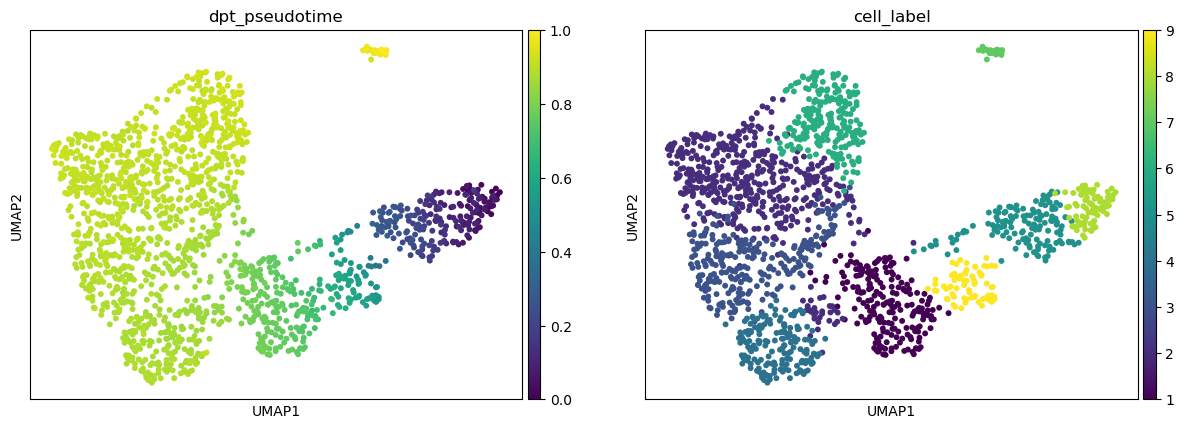

In [4]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['dpt_pseudotime', 'cell_label'])

In [5]:
adata.obs['dpt_pseudotime'].to_csv('nest.dpt_pseudotime.csv')

In [6]:
sc.external.tl.palantir(adata)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...


In [7]:
pal_res = sc.external.tl.palantir_results(adata,early_cell=adata.obs_names[657])

Sampling and flocking waypoints...
Time for determining waypoints: 0.0037376085917154946 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.16507046222686766 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [8]:
%matplotlib inline

In [9]:
X_umap = adata.obsm['X_umap']

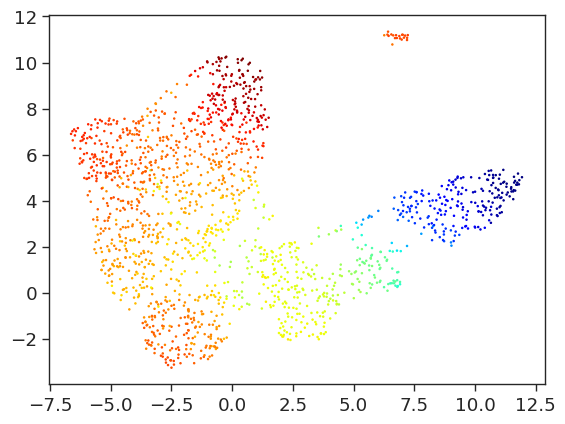

In [10]:
plt.scatter(X_umap[:,0],X_umap[:,1], s =1,c=pal_res.pseudotime.values,cmap="jet") 
plt.show()

In [11]:
pal_res.pseudotime.to_csv('nest.palantir_pseudotime.csv')

In [12]:
X_pca = adata.obsm['X_pca']
cell_label = adata.obs['cell_label']

In [13]:
pd.DataFrame(cell_label).to_csv('nest.cell_label.csv')

In [14]:
pd.DataFrame(X_pca).to_csv('nest.Y_pca.csv')

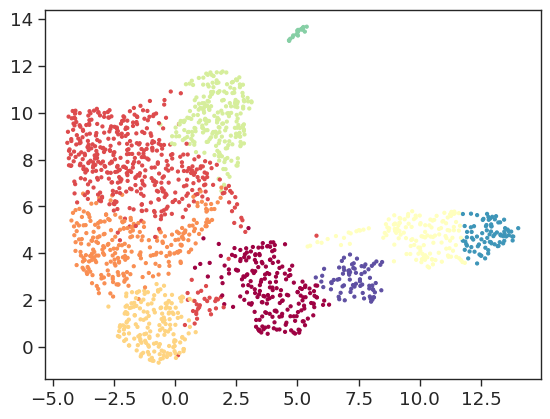

In [15]:
from umap import UMAP

reducer = UMAP(min_dist=0.5) 
Y_umap = reducer.fit_transform(X_pca)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=cell_label,s =5,cmap="Spectral")

In [16]:
pd.DataFrame(Y_umap).to_csv('nest.Y_umap.csv')

In [17]:
from sklearn import manifold

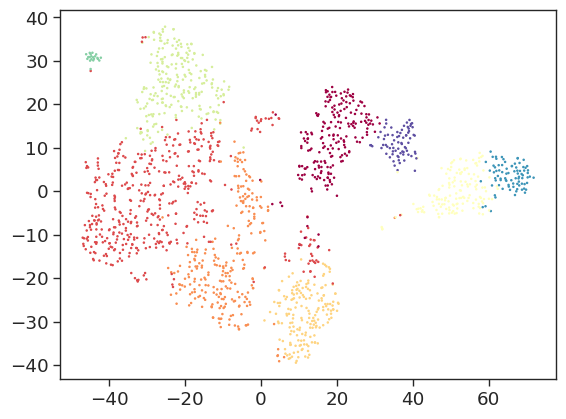

In [18]:
tsne_operator = manifold.TSNE(random_state=0)
Y_tsne = tsne_operator.fit_transform(X_pca)
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_label,s =1,cmap="Spectral")

In [19]:
pd.DataFrame(Y_tsne).to_csv('nest.Y_tsne.csv')

In [20]:
import phate

Calculating PHATE...
  Running PHATE on 1656 observations and 9 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 1.01 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.38 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.17 seconds.
Calculated PHATE in 4.65 seconds.


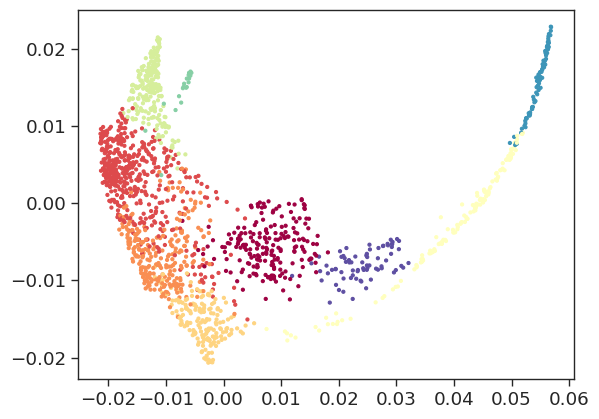

In [21]:
phate_operator = phate.PHATE(knn=10)
Y_phate = phate_operator.fit_transform(X_pca)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_label,s = 5,cmap="Spectral")

In [22]:
pd.DataFrame(Y_phate).to_csv('nest.Y_phate.csv')

In [24]:
import re
obs_names = adata.obs_names
cell_groups = [re.search(r'([^_]+)', obs).group(1) for obs in obs_names]
set(cell_groups)

{'HSPC', 'LT-HSC', 'Prog'}